# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
US_schools = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
                      col_types = cols()) 

In [3]:
US_schools |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
US_schools |>
    filter(mmr>=0) |>
    group_by(state) |>
    summarize(n.above.95 = sum(mmr>95, na.rm=TRUE), obs = n()) |>
    mutate(df_vacc_rates=n.above.95/obs) |> 
    arrange(desc(df_vacc_rates)) 

state,n.above.95,obs,df_vacc_rates
<chr>,<int>,<int>,<dbl>
Illinois,6889,7686,0.896304970
New York,3567,4159,0.857658091
Pennsylvania,1598,1939,0.824136153
Massachusetts,779,954,0.816561845
Connecticut,475,589,0.806451613
South Dakota,274,373,0.734584450
California,10398,14225,0.730966608
Montana,368,522,0.704980843
Utah,410,603,0.679933665


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

### Arkansas has the smallest fraction of schools above the CDC target vaccination rate of 95%. 

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [5]:
NC_schools = US_schools |> 
    filter(overall >=0, state=="North Carolina") |>
    arrange(overall) |>
    mutate(rk = row_number()/n()) |>
    select(state, overall, rk) 
NC_schools |>head()

state,overall,rk
<chr>,<dbl>,<dbl>
North Carolina,21.7,0.0004798464
North Carolina,40.3,0.0009596929
North Carolina,42.9,0.0014395393
North Carolina,43.5,0.0019193858
North Carolina,45.0,0.0023992322
North Carolina,45.3,0.0028790787


In [6]:
library('ggrepel')
library('scales')


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




Warning message:
“ggrepel: 2084 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


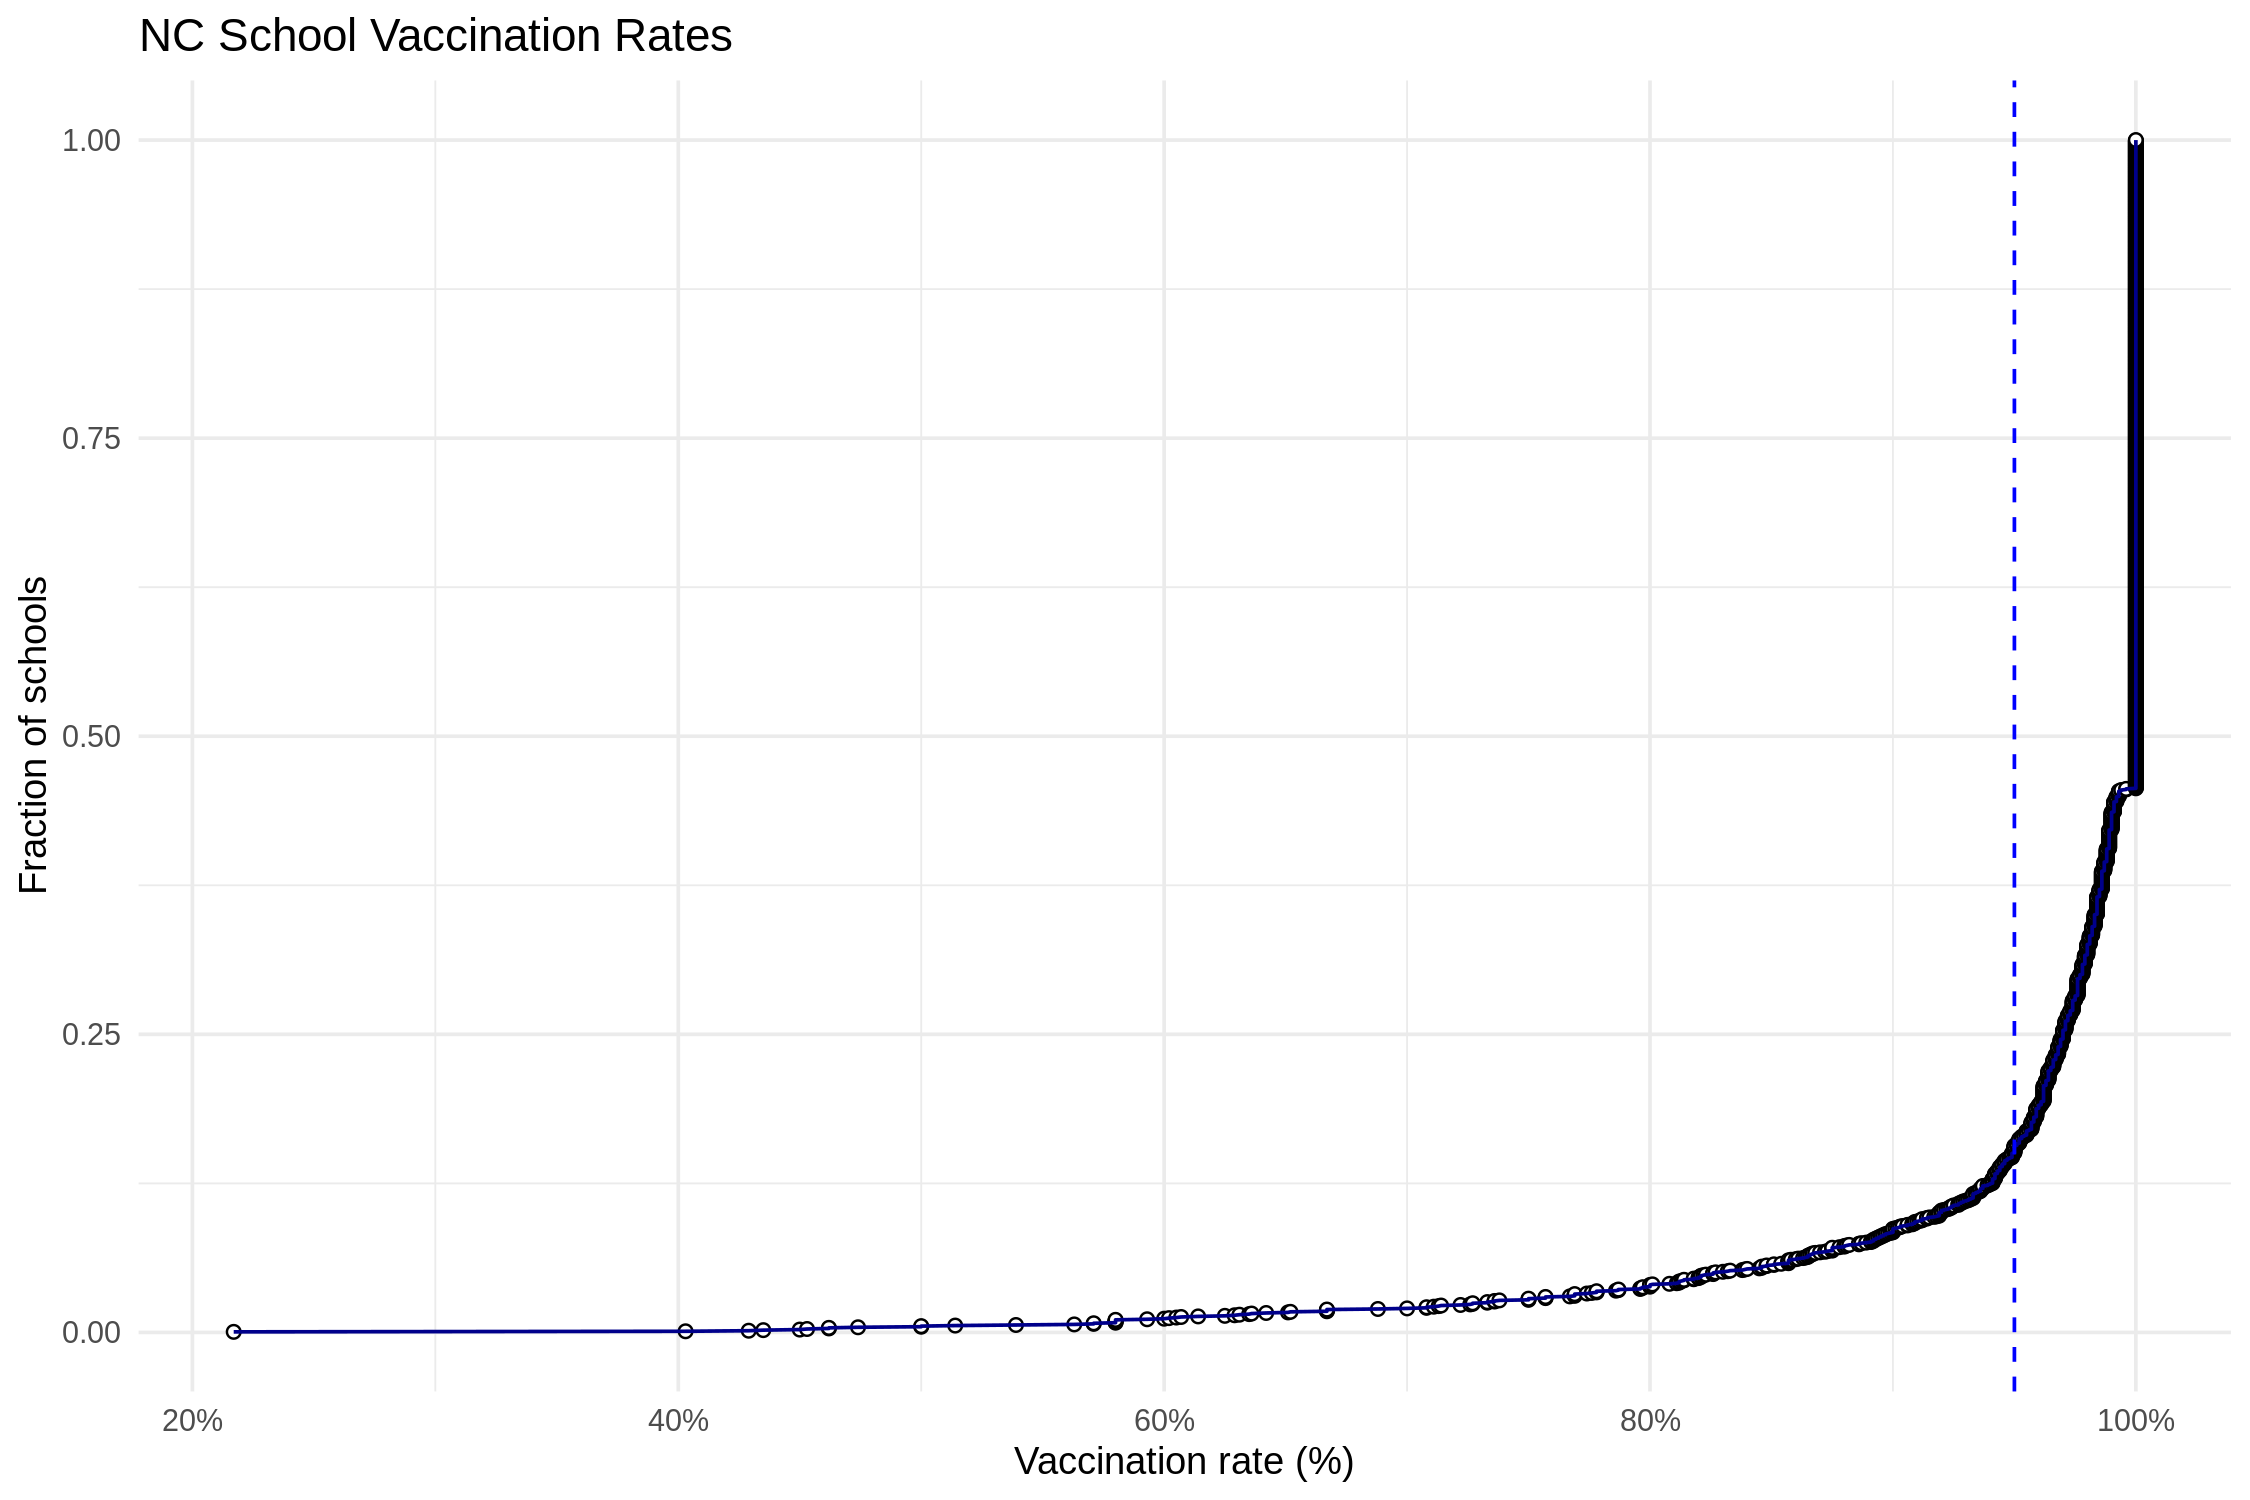

In [10]:
options(repr.plot.res = 250, repr.plot.height = 6, repr.plot.width = 9)

p= ggplot(NC_schools, aes(x=overall, y=rk)) + geom_point(color='black', fill='white', shape=21, size=1.5) + 
    geom_line(color='darkblue') +
    labs(x='Vaccination rate (%)', y = 'Fraction of schools', title="NC School Vaccination Rates") +
    scale_x_continuous(labels=scales::percent_format(scale = 1)) +
    geom_vline(data = NC_schools, mapping = aes(xintercept = 95), linetype=2, color='blue') +
    theme_minimal() +
    geom_text_repel(data = NC_schools, 
                        nudge_x = 1,
                        direction = 'y',
                        aes(label = "CDC recommended vaccination rate (95%)"), 
                        color = 'black') 
    
p


(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

In [8]:
# ![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)


![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?